In [7]:
# Setting up a custom stylesheet in IJulia
file = open("style.css") # A .css file in the same folder as this notebook file
styl = read(file,String) # Read the file
HTML("$styl") # Output as HTML

HTML{String}("<link href='http://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\r\n\r\n<style>\r\n\r\n@font-face {\r\n    font-family: \"Computer Modern\";\r\n    src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\r\n}\r\n\r\n\r\n\r\n/* Formatting for header cells */\r\n.text_cell_render h1 {\r\n    font-family: 'Philosopher', sans-serif;\r\n    font-weight: 400;\r\n    font-size: 2.2em;\r\n    line-height: 100%;\r\n    color: rgb(0, 80, 120);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n.text_cell_render h2 {\r\n    font-family: 'Philosopher', serif;\r\n    font-weight: 400;\r\n    font-size: 1.9em;\r\n    line-height: 100%;\r\n    color: rgb(200,100,0);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n\r\n.text_cell_render h3 {\r\n    font-family: 'Philosopher', serif;\r\n    margin-top:12px;\r\n    margin-bottom: 3px;\r\n    font-style: italic;\r\n    color: rgb(94,127,192);\r\n}\r\n\r\n.text_cell_render h4 {\r\n    font-family: 'Philosopher', serif;\r\n}\r\n\r\n.text_cell_render h5 {\r\n    font-family: 'Alegreya Sans', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 16pt;\r\n    color: grey;\r\n    font-style: italic;\r\n    margin-bottom: .1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\r\n\r\n.text_cell_render h6 {\r\n    font-family: 'PT Mono', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 10pt;\r\n    color: grey;\r\n    margin-bottom: 1px;\r\n    margin-top: 1px;\r\n}\r\n\r\n.CodeMirror{\r\n        font-family: \"PT Mono\";\r\n        font-size: 100%;\r\n}\r\n\r\n</style>\r\n\r\n")

<h1> Multiple curves in a single diagram </h1>

<h2>In this lecture</h2>

- [Outcome](#Outcome)
- ["if" statements](#"if"-statements)
- [Using "for" and "if" to fill in missing data](#Using-"for"-and-"if"-to-fill-in-missing-data)
- [Plotting the different countries' data simultaneously](#Plotting-the-different-countries'-data-simultaneously)
- [Customising the simultaneous plot](#Customising-the-simultaneous-plot)

[Back to the top](#In-this-lecture)

<h2>Outcome</h2>

After this lecture, you will be able to
- Use ``if`` to check for and remove non-numerical values in the data
- Plot several data series simultaneously
- Provide different markers and colours for the several data series
- Provide names to use in a legend for the plot

[Back to the top](#In-this-lecture)

<h2>"if" statements</h2>

The ``if`` statement, and variations thereof, are one of the most fundamental structures in  any programming language.

Basically, from time to time, a program needs to choose between a path on which to proceed.

The simplest choice is between doing something and doing nothing, which applies to a few of  the data in our West African EVD data set. Let's load it now to illustrate; we slice to show only the last 10 lines, which is where the missing data are. 

[Back to the top](#In-this-lecture)

In [8]:
using DelimitedFiles
EVDdata = DelimitedFiles.readdlm("wikipediaEVDdatesconverted.csv", ',') # again: don't forget the delimiter!
EVDdata[end-9:end, :] # note the use of "end" in the array slicing
                      # ... and that end-9:end is a range with 10 elements

10×9 Matrix{Any}:
 123  1201  672  427  319  249     129     525     224
 114   982  613  411  310  174     106     397     197
 102   779  481  412  305  115      75     252     101
  87   528  337  398  264   33      24      97      49
  66   309  202  281  186   12      11      16       5
  51   260  182  248  171   12      11        "–"     "–"
  40   239  160  226  149   13      11        "-"     "-"
  23   176  110  168  108    8       2        "–"     "–"
   9   130   82  122   80    8       2        "–"     "–"
   0    49   29   49   29     "–"     "–"     "–"     "–"

We see that some of  them are not numbers. The last four columns (check the Wikipedia page again to confirm) are for Liberia and Sierra Leone. The absent data are because the first cases in those countries were reported after 22 March 2014.

We would like to change them. First let's look at "if" statements, via some examples

In [9]:
a = rand()
println("a now has the value $a")
if a > 0.5
    println("this is quite a large value")
end

a now has the value 0.5869385207311248
this is quite a large value


In [4]:
# let's run this through a for loop to see it many times
# NB! Note the  use of indentation to mark the start and end of the for and if structures

for k = 1:8
   b = rand()
   println("b now has the value $b")
   if b > 0.5
      println("this is quite a large value")
   end 
end

b now has the value 0.4903382175298048
b now has the value 0.12535120166847458
b now has the value 0.6941327778042203
this is quite a large value
b now has the value 0.7890162055101195
this is quite a large value
b now has the value 0.45748698342014715
b now has the value 0.24572613080423933
b now has the value 0.3735592779042034
b now has the value 0.25746033778525423


<h2>Using "for" and "if" to fill in missing data</h2>

Now we loop over *all* the data values. We use the function ``isdigit()`` to test whether the data value can be read as a number. This function returns either "true" or "false", so it is perfect for an ``if`` test.

Now, ``isdigit()`` as a test only works if the argument is a character. Since we have no idea what the data may be, we first convert it to a string, and then test if the first character in the string one of the digits. Of course, this is not perfect: if the entry is the string "1 January" it will appear to be a number by this test. But we know that we're testing for entries that do not start with a digit, so that's fine.

Since any string converts to a string, we can safely use the function ``string()`` to convert the numbers to strings before we test with ``isdigit()``.

And of course, whenever our ``isdigit(...)`` code evaluates to ``false``, we must replace that element of the array with something useful. I choose the number 0 as the replacement, but other choices also work (notably ``NaN`` and ``missing``); the best choice depends on the context and what you want to achieve. The question of wrong and missing values is actually a fairly advanced topic in data handling and statistics, and we don't pursue it here (with some regret, because handling them is one of Julia's great strengths).

In [10]:
rows, cols = size(EVDdata)  # size() is a very useful function ... look it up with "? size"
for j = 1:cols
    for i = 1:rows  # this order goes does one column at a time
       if !isdigit(string(EVDdata[i, j])[1]) # remember that "!" is the NOT operator (week 1, lecture 5)
         EVDdata[i,j] = 0
       end
   end
end

Let's check those last few rows to see how  it worked:

In [11]:
EVDdata[end-9:end, :]

10×9 Matrix{Any}:
 123  1201  672  427  319  249  129  525  224
 114   982  613  411  310  174  106  397  197
 102   779  481  412  305  115   75  252  101
  87   528  337  398  264   33   24   97   49
  66   309  202  281  186   12   11   16    5
  51   260  182  248  171   12   11    0    0
  40   239  160  226  149   13   11    0    0
  23   176  110  168  108    8    2    0    0
   9   130   82  122   80    8    2    0    0
   0    49   29   49   29    0    0    0    0

[Back to the top](#In-this-lecture)

<h2>Plotting the different countries' data simultaneously</h2>

This is rather easy. We provide a first series for the x-values (namely the  series epidays) and then we extract as an array the three columns with the individual countries. The plot is then a really simple function statement---that's the beauty of Plots.

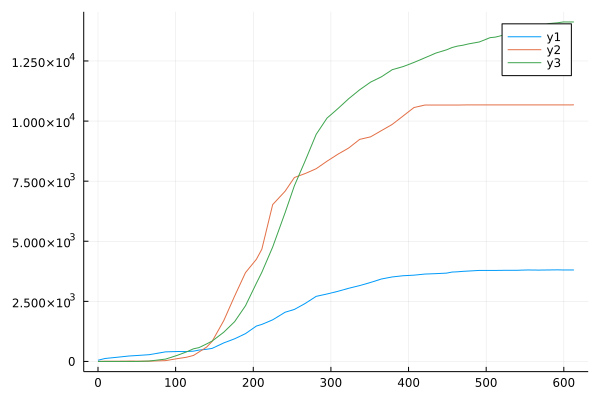

In [12]:
# extract the data
epidays = EVDdata[:,1]

# Note that we need to convert EVDdata[:, [4, 6, 8]] that has Matrix{Any} type to either Integer or Float type to be used in plots.
# Here we're converting to Integer type - Matrix{Int64}
EVDcasesbycountry = convert.(Int, EVDdata[:, [4, 6, 8]])

# load Plots and plot them
using Plots
gr()
plot(epidays, EVDcasesbycountry)

[Back to the top](#In-this-lecture)

<h2>Customising the simultaneous plot</h2>

The plot above is already fairly useful, but a better legend would help, and again I would prefer to be reminded that the data is only for every week or so, sometimes even less often. Title and axis labels are needed also. In this case perhaps the grid lines will also help to read the plot.

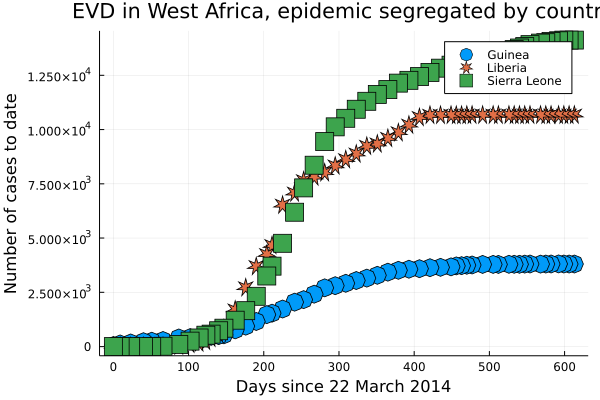

In [13]:
plot(epidays, EVDcasesbycountry,
marker = ([:octagon :star7 :square], 9),
label  = ["Guinea" "Liberia" "Sierra Leone"],
title  = "EVD in West Africa, epidemic segregated by country",
xlabel = "Days since 22 March 2014",
ylabel = "Number of cases to date",
line   = (:scatter)
)

It can be tricky to place legends. Above, Plots has done it's best and it's acceptable but not great. Suppose we don't like what Plots have done and prefer to put top left.The option ``topleft`` (again, note the use of ``:`` to show it is a value of an attribute) will do nicely, we have to pass it to the keyword ``legend``, see below.

Alternatively, a slightly transparent legend will show that the plot continues as expected below it (this is done by specifying an alpha level smaller than 1; look at the Plots website for details). Legends outside the plot area may also be specified.



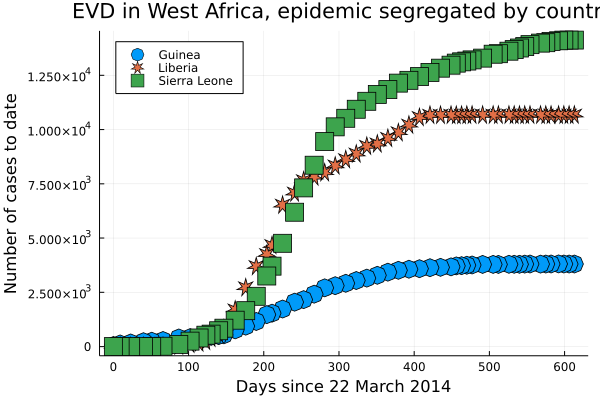

In [14]:
plot(epidays, EVDcasesbycountry,
legend = :topleft,
marker = ([:octagon :star7 :square], 9),
label  = ["Guinea" "Liberia" "Sierra Leone"],
title  = "EVD in West Africa, epidemic segregated by country",
xlabel = "Days since 22 March 2014",
ylabel = "Number of cases to date",
line   = (:scatter)
)

And why not save the plot?

In [15]:
savefig("L5testfig.pdf")  #the extension defines the filetype, see documentation for alternativesn to PDF.

[Back to the top](#In-this-lecture)